In [371]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [372]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df = pd.read_csv("./berlin-airbnb-data/listings_summary.csv")

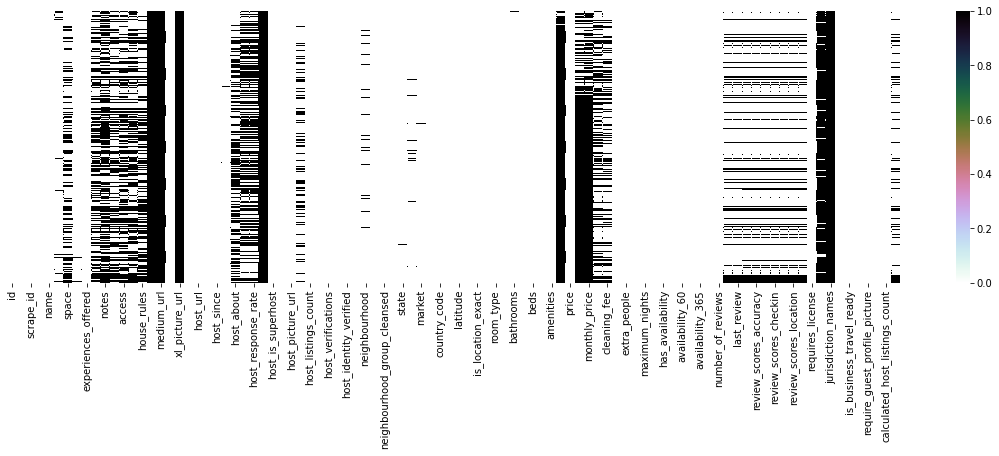

In [373]:
#source : https://www.kaggle.com/mhmdpkts/predict-price-ann-data-cleaning-future-engineering
fig, ax = plt.subplots(figsize = (20, 5))
sns.heatmap(df.isna(), cmap = "cubehelix_r", yticklabels='')
plt.show()

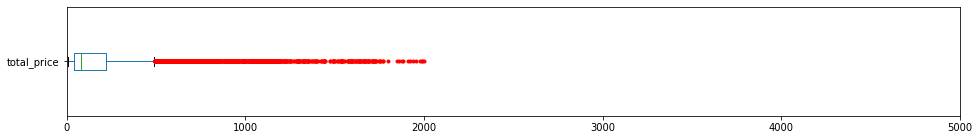

In [374]:
#Sort out the Price-Section

df.price = df.price.str.replace('$', '').str.replace(',', '').astype(float)
df.cleaning_fee = df.cleaning_fee.str.replace('$', '').str.replace(',', '').astype(float)
df.security_deposit = df.security_deposit.str.replace('$', '').str.replace(',', '').astype(float)
df.extra_people = df.extra_people.str.replace('$', '').str.replace(',', '').astype(float)

df['cleaning_fee'].fillna(0, inplace=True)
df['security_deposit'].fillna(0, inplace=True)
df['total_price'] = df['price'] + df['cleaning_fee'] + df['security_deposit']
df.drop(df[ (df.total_price > 2000) | (df.total_price == 0) ].index, axis=0, inplace=True)
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
df['total_price'].plot(kind='box', xlim=(0, 5000), vert=False, flierprops=red_square, figsize=(16,2))
#drop the columns that were merged 
df.drop(['cleaning_fee', 'security_deposit', 'price'], inplace=True, axis = 1)

In [375]:
def nan_checker(df):
    df_nan = pd.DataFrame([[var, df[var].isna().sum() / df.shape[0], df[var].dtype]
                           for var in df.columns if df[var].isna().sum() > 0],
                          columns=['var', 'proportion', 'dtype'])
    return df_nan

In [376]:
#removing 100% of the NULL values and identity values
col_list_to_drop = [] 
columns = df.columns
df_nan = nan_checker(df)
length = len(df)
for col in df.columns:  
    if (df[col].dtype != 'float64'and df[col].nunique(dropna=True) == df[col].notnull().sum()):
        col_list_to_drop.append(col)
df.drop(col_list_to_drop, inplace=True, axis = 1)

In [377]:
df_nan = nan_checker(df)
df_nan

,var,proportion,dtype
0,name,0.002594,object
1,summary,0.041907,object
2,space,0.379892,object
3,description,0.009034,object
4,neighborhood_overview,0.489333,object
5,notes,0.680844,object
6,transit,0.422470,object
7,access,0.519388,object
8,interaction,0.539693,object
9,house_rules,0.494208,object


In [378]:
for row in df_nan.iterrows():
    column_name = row[1]['var']
    rate = round(row[1]['proportion'], 3)
    if rate > 0.5:
        df.drop(column_name, inplace=True, axis = 1)

In [379]:
df.describe(include="all")

,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,transit,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,total_price
count,2.235900e+04,22359,22301,21422,13865,22157,22359,11418,12913,11309,22359,2.235900e+04,22359,22334,22334,22245,22334,22334,22334,17307,22334.000000,22334.000000,22359,22334,22334,22359,21241,22359,22359,22354,22278,21708,22296,22359,22359,22359,22359.000000,22359.000000,22359,22359,22359,22359.000000,22327.000000,22341.000000,22319.000000,22359,22359,22359.000000,22359.000000,22359.000000,2.235900e+04,22359,22359,22359.000000,22359.000000,22359.000000,22359.000000,22359,22359.000000,18513,18519,18039.000000,18014.000000,18017.000000,17996.000000,18010.000000,17997.000000,17993.000000,22359,22359,22359,22359,22359,22359,22359.000000,18513.000000,22359.000000
unique,NaN,2,21686,20880,13460,21822,1,10671,12192,10246,22273,NaN,19061,5969,2912,1032,2,18982,18982,180,NaN,NaN,299,2,2,86,91,136,12,60,19,215,6,61,1,1,NaN,NaN,2,33,3,NaN,NaN,NaN,NaN,5,19819,NaN,NaN,NaN,NaN,75,1,NaN,NaN,NaN,NaN,2,NaN,2220,1308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,1,5,2,2,NaN,NaN,NaN
top,NaN,2018-11-07,Berlin Wohnung,"with en-suite bathroom, TV, WIFI, bed linen, a...",The Singer 109 Hostel is located in the heart ...,We are located in one of the most colorful dis...,none,Welcome Traveler. The Singer Hostel and Apart...,U-Bahn / Underground /Subway / Metro: U5 (Stra...,"- Most importantly, please have a respectful a...",https://a0.muscache.com/im/pictures/e62cc6e1-c...,NaN,https://www.airbnb.com/users/show/1625771,Anna,2017-02-20,"Berlin, Berlin, Germany",f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,Neukölln,NaN,NaN,"['email', 'phone', 'reviews']",t,f,"Berlin, Berlin, Germany",Neukölln,Tempelhofer Vorstadt,Friedrichshain-Kreuzberg,Berlin,Berlin,10245,Berlin,"Berlin, Germany",DE,Germany,NaN,NaN,t,Apartment,Private room,NaN,NaN,NaN,NaN,Real Bed,{},NaN,NaN,NaN,NaN,today,t,NaN,NaN,NaN,NaN,2018-11-07,NaN,2017-05-28,2018-11-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,f,flexible,f,f,NaN,NaN,NaN
freq,NaN,22356,14,14,41,12,22359,43,26,30,3,NaN,45,213,51,17040,19354,56,56,2546,NaN,NaN,4081,22278,13704,22137,3199,1317,5470,22234,22227,850,22290,22236,22359,22359,NaN,NaN,16636,20090,11475,NaN,NaN,NaN,NaN,21577,74,NaN,NaN,NaN,NaN,2465,22359,NaN,NaN,NaN,NaN,22356,NaN,116,617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22351,15385,22359,9038,22204,22083,NaN,NaN,NaN
mean,2.018111e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.398976e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.315841,2.315841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.509840,13.406303,NaN,NaN,NaN,2.630127,1.091392,1.157961,1.617232,NaN,NaN,1.330068,8.231495,6.919093,1.039345e+05,NaN,NaN,4.897178,11.042041,19.850619,78.988148,NaN,17.926115,NaN,NaN,94.415322,9.665038,9.324915,9.713381,9.731260,9.505029,9.412160,NaN,NaN,NaN,NaN,NaN,NaN,1.901874,1.137277,176.810770
std,0.000000e+00,NaN,NaN,

we will not be using the reviews or host details for our analysis. We will separate out the location information,

In [461]:
review_host_text_columns =["scrape_id","picture_url",
                           "last_scraped", "name",
                           "summary", "space","description",
                           "experiences_offered", "neighborhood_overview",
                           "transit","house_rules", "host_id", "host_url",
                           "host_location","host_neighbourhood",
                           "host_name","host_since", "host_is_superhost", 
                           "host_thumbnail_url","host_picture_url","host_listings_count",
                           "host_total_listings_count", "host_verifications",
                           "host_has_profile_pic","host_identity_verified",
                           "minimum_nights","maximum_nights","calendar_updated",
                           "has_availability","availability_30",
                           "availability_60","availability_90",
                           "availability_365","calendar_last_scraped",
                           "number_of_reviews","first_review",
                           "last_review","review_scores_rating",
                           "review_scores_accuracy","review_scores_cleanliness",
                           "review_scores_checkin","review_scores_communication",
                           "review_scores_location","review_scores_value",
                           "is_business_travel_ready",
                           "require_guest_profile_picture","require_guest_phone_verification",
                           "calculated_host_listings_count", "reviews_per_month"]

df_dropped = df.drop(review_host_text_columns, inplace=False, axis = 1)
df_dropped.describe(include="all")

,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,guests_included,extra_people,requires_license,instant_bookable,cancellation_policy,total_price
count,22359,21241,22359,22359,22354,22278,21708,22296,22359,22359,22359,22359.000000,22359.000000,22359,22359,22359,22359.000000,22327.000000,22341.000000,22319.000000,22359,22359,22359.000000,22359.000000,22359,22359,22359,22359.000000
unique,86,91,136,12,60,19,215,6,61,1,1,NaN,NaN,2,33,3,NaN,NaN,NaN,NaN,5,19819,NaN,NaN,2,2,5,NaN
top,"Berlin, Berlin, Germany",Neukölln,Tempelhofer Vorstadt,Friedrichshain-Kreuzberg,Berlin,Berlin,10245,Berlin,"Berlin, Germany",DE,Germany,NaN,NaN,t,Apartment,Private room,NaN,NaN,NaN,NaN,Real Bed,{},NaN,NaN,t,f,flexible,NaN
freq,22137,3199,1317,5470,22234,22227,850,22290,22236,22359,22359,NaN,NaN,16636,20090,11475,NaN,NaN,NaN,NaN,21577,74,NaN,NaN,22351,15385,9038,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.509840,13.406303,NaN,NaN,NaN,2.630127,1.091392,1.157961,1.617232,NaN,NaN,1.330068,8.231495,NaN,NaN,NaN,176.810770
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030869,0.057945,NaN,NaN,NaN,1.498205,0.328126,0.641645,1.170113,NaN,NaN,0.831068,11.065472,NaN,NaN,NaN,232.592978
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.345803,13.103557,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,8.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.489012,13.375745,NaN,NaN,NaN,2.000000,1.000000,1.000000,1.000000,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,40.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.509108,13.416990,NaN,NaN,NaN,2.000000,1.000000,1.000000,1.000000,NaN,NaN,1.000000,5.000000,NaN,NaN,NaN,80.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.532702,13.439347,NaN,NaN,NaN,3.000000,1.000000,1.000000,2.000000,NaN,NaN,1.000000,15.000000,NaN,NaN,NaN,220.000000


<h1> Beginning of prediction </h1>

In [564]:
#outlier detection with z score
def detect_outlier(data_1):
    feature_outliers=[]
    threshold=7
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    counter=0
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            feature_outliers.append(counter)
        counter += 1
    return feature_outliers

In [565]:
# #source : https://www.kaggle.com/mhmdpkts/predict-price-ann-data-cleaning-future-engineering
# #create distance feature from latitude and longtitude 
# from geopy.distance import great_circle
# def distance_from_berlin(lat, lon):
#     berlin_centre = (52.5027778, 13.404166666666667)
#     record = (lat, lon)
#     #returns surface distance in kilometers
#     return great_circle(berlin_centre, record).km

# #add distanse dataset
# df_dropped['distance'] = df_dropped.apply(lambda x: distance_from_berlin(x.latitude, x.longitude), axis=1)

In [566]:
location_columns_for_prediction = ["street","neighbourhood",
                                   "neighbourhood_cleansed",
                                   "city","state","zipcode","market", "smart_location",
                                   "country_code","country","latitude","longitude",
                                   "is_location_exact","total_price"]
non_location_columns_for_prediction = [col for col in df_dropped.columns if col not in location_columns_for_prediction]
non_location_columns_for_prediction.append("total_price")

#get a new data_frame for both
dataFrameLoc =   df_dropped[location_columns_for_prediction] 
dataFrame    =   df_dropped[non_location_columns_for_prediction]

In [567]:
#amenities count
def amenities_counter(x):
    return len(x.split(","))

dataFrame["amenities_count"] = dataFrame.amenities.map(amenities_counter)
dataFrame.drop(["amenities"], inplace=True, axis = 1)
dataFrame.head()

<ipython-input-567-45a55ab1b4fe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame["amenities_count"] = dataFrame.amenities.map(amenities_counter)
/home/arunhiremath/sfsu/data_mining/venv/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,extra_people,requires_license,instant_bookable,cancellation_policy,distance,total_price,amenities_count
0,Mitte,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,1,28.0,t,f,strict_14_with_grace_period,3.533182,290.0,29
1,Pankow,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,1,0.0,t,f,flexible,5.085573,17.0,10
2,Pankow,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,2,20.0,t,t,strict_14_with_grace_period,3.695677,340.0,19
3,Tempelhof - Schöneberg,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,1,18.0,t,f,strict_14_with_grace_period,3.755285,306.0,29
4,Pankow,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,1,24.0,t,f,moderate,4.550423,42.0,13


In [568]:
dataFrame_nan = nan_checker(dataFrame)
dataFrame_nan.head()

,var,proportion,dtype
0,bathrooms,0.001431,float64
1,bedrooms,0.000805,float64
2,beds,0.001789,float64


In [569]:
from sklearn.impute import SimpleImputer
#filling all the missing values with mean
numerical_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
category__imputer = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
#Make a copy of the dataFrame
df_impute_train = dataFrame.iloc[:, :].copy(deep=True)

In [570]:
for row in dataFrame_nan.iterrows():
    column_name = row[1]['var']
    if dataFrame[column_name].dtype == 'float64':
        df_impute_train[column_name] = numerical_imputer.fit_transform(df_impute_train[[column_name]])
    else:
        df_impute_train[column_name] = category__imputer.fit_transform(df_impute_train[[column_name]])


In [571]:
dataFrame_nan = nan_checker(df_impute_train)
dataFrame_nan.head()

,var,proportion,dtype


In [572]:
print(df_impute_train["property_type"].unique())
property_mapping = {'Guesthouse':'Guesthouse', 'Apartment':'Apartment', 'Condominium':'others', 'Loft':'others','House':'Apartment','Serviced apartment':'others','Townhouse':'others','Boutique hotel':'others','Bed and breakfast':'others',
                    'Bungalow':'others','Boat':'others','Guest suite':'others','Other':'others','Island':'others',
                    'Hostel':'others','Train':'others','Camper/RV':'others','Houseboat':'others','Cabin':'others',
                    'Cottage':'others','Tiny house':'others','Chalet':'others','Castle':'others','Villa':'others',
                    'Aparthotel':'others','Hotel':'Hotel','Tipi':'others','Resort':'Resort','In-law':'others',
                    'Cave':'others','Barn':'others','Pension (South Korea)':'others','Guesthouse':'others','Casa particular (Cuba)':'others','others':'others'}
df_impute_train['property_type']=df_impute_train['property_type'].map(property_mapping)
print(df_impute_train["property_type"].unique())
df_impute_train[categoical_columns].describe()

['Guesthouse' 'Apartment' 'Condominium' 'Loft' 'House'
 'Serviced apartment' 'Townhouse' 'Boutique hotel' 'Bed and breakfast'
 'Bungalow' 'Boat' 'Guest suite' 'Other' 'Island' 'Hostel' 'Train'
 'Camper/RV' 'Houseboat' 'Cabin' 'Cottage' 'Tiny house' 'Chalet' 'Castle'
 'Villa' 'Aparthotel' 'Hotel' 'Tipi' 'Resort' 'In-law' 'Cave' 'Barn'
 'Pension (South Korea)' 'Casa particular (Cuba)']
['others' 'Apartment' 'Hotel' 'Resort']


,neighbourhood_group_cleansed,room_type,bed_type,cancellation_policy
count,22359,22359,22359,22359
unique,12,3,5,5
top,Friedrichshain-Kreuzberg,Private room,Real Bed,flexible
freq,5470,11475,21577,9038


In [573]:
#convert boolean in to 0 or 1
boolean_mapping =  {'t':1, 'f':0, 0:0, 1:1}
df_impute_train['requires_license']=df_impute_train['requires_license'].map(boolean_mapping)
df_impute_train.head()

,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,extra_people,requires_license,instant_bookable,cancellation_policy,distance,total_price,amenities_count
0,Mitte,others,Entire home/apt,3,1.0,1.0,2.0,Real Bed,1,28.0,1,f,strict_14_with_grace_period,3.533182,290.0,29
1,Pankow,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,1,0.0,1,f,flexible,5.085573,17.0,10
2,Pankow,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,2,20.0,1,t,strict_14_with_grace_period,3.695677,340.0,19
3,Tempelhof - Schöneberg,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,1,18.0,1,f,strict_14_with_grace_period,3.755285,306.0,29
4,Pankow,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,1,24.0,1,f,moderate,4.550423,42.0,13


In [574]:
#convert boolean in to 0 or 1
boolean_mapping =  {'t':1, 'f':0, 0:0, 1:1}
df_impute_train['instant_bookable']=df_impute_train['instant_bookable'].map(boolean_mapping)
df_impute_train.head()

,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,extra_people,requires_license,instant_bookable,cancellation_policy,distance,total_price,amenities_count
0,Mitte,others,Entire home/apt,3,1.0,1.0,2.0,Real Bed,1,28.0,1,0,strict_14_with_grace_period,3.533182,290.0,29
1,Pankow,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,1,0.0,1,0,flexible,5.085573,17.0,10
2,Pankow,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,2,20.0,1,1,strict_14_with_grace_period,3.695677,340.0,19
3,Tempelhof - Schöneberg,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,1,18.0,1,0,strict_14_with_grace_period,3.755285,306.0,29
4,Pankow,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,1,24.0,1,0,moderate,4.550423,42.0,13


In [575]:
df_impute_train["bed_type"].unique()
bed_mapping =  {'Real Bed':'Real Bed', 
                'Others':'Others',
                'Pull-out Sofa': 'Others',
                'Couch':'Others',
                'Futon':'Others',
                'Airbed':'Others'}
df_impute_train['bed_type']=df_impute_train['bed_type'].map(bed_mapping)
df_impute_train.head()

,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,extra_people,requires_license,instant_bookable,cancellation_policy,distance,total_price,amenities_count
0,Mitte,others,Entire home/apt,3,1.0,1.0,2.0,Real Bed,1,28.0,1,0,strict_14_with_grace_period,3.533182,290.0,29
1,Pankow,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,1,0.0,1,0,flexible,5.085573,17.0,10
2,Pankow,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,2,20.0,1,1,strict_14_with_grace_period,3.695677,340.0,19
3,Tempelhof - Schöneberg,Apartment,Private room,2,1.0,1.0,1.0,Others,1,18.0,1,0,strict_14_with_grace_period,3.755285,306.0,29
4,Pankow,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,1,24.0,1,0,moderate,4.550423,42.0,13


In [576]:
# df_impute_train["cancellation_policy"].unique()
# cancellation_mapping =  {'strict_14_with_grace_period':'strict', 
#                 'flexible':'flexible',
#                 'moderate': 'moderate',
#                 'super_strict_30':'strict',
#                 'super_strict_60':'strict',
#                 'strict':'strict'}
# df_impute_train['cancellation_policy']=df_impute_train['cancellation_policy'].map(cancellation_mapping)
# df_impute_train.head()

<h1>Section for dropping Features<h1>


In [579]:
df_impute_train.drop(["property_type", "extra_people"],inplace=True, axis = 1)

In [580]:
#Generate a Categorical and Numerical Column List
numerical_columns = []
categoical_columns = []
for column in df_impute_train.columns:
    if df_impute_train[column].dtype == 'object':
        categoical_columns.append(column)
    else:
        numerical_columns.append(column)

<h1>Label Encoder Based </h1>

In [581]:
data_frame_for_prediction = df_impute_train.iloc[:, :].copy(deep=True)

In [583]:
#First lets try prediction with Labelencoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for col in data_frame_for_prediction.columns:
    if data_frame_for_prediction[col].dtype == 'object':
        data_frame_for_prediction[col] = labelencoder.fit_transform(data_frame_for_prediction[col])
data_frame_for_prediction.describe(include='all')


,neighbourhood_group_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,requires_license,instant_bookable,cancellation_policy,distance,total_price,amenities_count
count,22359.000000,22359.000000,22359.000000,22359.000000,22359.000000,22359.000000,22359.000000,22359.000000,22359.000000,22359.000000,22359.000000,22359.000000,22359.000000,22359.000000
mean,4.139273,0.539425,2.630127,1.091392,1.157961,1.617232,0.965025,1.330068,0.999642,0.311910,0.879154,4.548637,176.810770,16.091328
std,2.939381,0.524086,1.498205,0.327891,0.641386,1.169066,0.183720,0.831068,0.018913,0.463284,0.824947,2.667263,232.592978,8.917126
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.198956,8.000000,1.000000
25%,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.975201,40.000000,10.000000
50%,4.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,4.088786,80.000000,14.000000
75%,6.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,5.550925,220.000000,20.000000
max,11.000000,2.000000,16.000000,8.500000,12.000000,22.000000,1.000000,16.000000,1.000000,1.000000,4.000000,25.012109,2000.000000,71.000000


In [584]:
from sklearn.preprocessing import StandardScaler

# The StandardScaler
ss = StandardScaler()

# Standardize the training data
df_ss_train = pd.DataFrame(ss.fit_transform(data_frame_for_prediction), columns=data_frame_for_prediction.columns)
df_ss_train.head()

,neighbourhood_group_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,requires_license,instant_bookable,cancellation_policy,distance,total_price,amenities_count
0,-0.047383,-1.029290,0.246883,-0.278732,-0.246286,0.327421,0.190374,-0.397171,0.018919,-0.673275,1.358718,-0.380719,0.486652,1.447659
1,0.633048,0.878835,-0.420597,-0.278732,-0.246286,-0.527982,0.190374,-0.397171,0.018919,-0.673275,-1.065733,0.201311,-0.687099,-0.683120
2,0.633048,-1.029290,0.914364,-0.278732,-0.246286,0.327421,0.190374,0.806127,0.018919,1.485278,1.358718,-0.319796,0.701624,0.326197
3,1.993909,0.878835,-0.420597,-0.278732,-0.246286,-0.527982,-5.252816,-0.397171,0.018919,-0.673275,1.358718,-0.297447,0.555443,1.447659
4,0.633048,0.878835,-0.420597,-0.278732,-0.246286,0.327421,0.190374,-0.397171,0.018919,-0.673275,0.146493,0.000670,-0.579612,-0.346681


In [585]:
outliers = np.array([])
print("--Feature and Outlier Counts--\n")
for i in df_ss_train.columns:
    f_out = detect_outlier(df_ss_train[i])
    outliers = np.concatenate((outliers,np.asarray(f_out)))
    print(i ," outlier count :",len(f_out))
                              
outliers = np.unique(outliers,0)
print("Total Unique Outlier Index Count:",len(outliers))
clean_data = df_ss_train.drop(outliers,axis=0)
clean_data.head()

--Feature and Outlier Counts--

neighbourhood_group_cleansed  outlier count : 0
room_type  outlier count : 0
accommodates  outlier count : 33
bathrooms  outlier count : 27
bedrooms  outlier count : 19
beds  outlier count : 46
bed_type  outlier count : 0
guests_included  outlier count : 51
requires_license  outlier count : 8
instant_bookable  outlier count : 0
cancellation_policy  outlier count : 0
distance  outlier count : 9
total_price  outlier count : 12
amenities_count  outlier count : 0
Total Unique Outlier Index Count: 137


,neighbourhood_group_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,requires_license,instant_bookable,cancellation_policy,distance,total_price,amenities_count
0,-0.047383,-1.029290,0.246883,-0.278732,-0.246286,0.327421,0.190374,-0.397171,0.018919,-0.673275,1.358718,-0.380719,0.486652,1.447659
1,0.633048,0.878835,-0.420597,-0.278732,-0.246286,-0.527982,0.190374,-0.397171,0.018919,-0.673275,-1.065733,0.201311,-0.687099,-0.683120
2,0.633048,-1.029290,0.914364,-0.278732,-0.246286,0.327421,0.190374,0.806127,0.018919,1.485278,1.358718,-0.319796,0.701624,0.326197
3,1.993909,0.878835,-0.420597,-0.278732,-0.246286,-0.527982,-5.252816,-0.397171,0.018919,-0.673275,1.358718,-0.297447,0.555443,1.447659
4,0.633048,0.878835,-0.420597,-0.278732,-0.246286,0.327421,0.190374,-0.397171,0.018919,-0.673275,0.146493,0.000670,-0.579612,-0.346681


In [587]:
from sklearn.model_selection import train_test_split

#columns in prediction : 
columns_in_prediction = [col for col in clean_data.columns if col != "total_price"]
X_train, X_test, y_train, y_test = train_test_split(clean_data[columns_in_prediction], clean_data['total_price'], test_size=0.2)


In [588]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor    
from sklearn.metrics import mean_squared_error, r2_score

# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
dt = regressor.fit(X_train, y_train) 
y_prediction = dt.predict(X_test)
r2 = r2_score(y_test, y_prediction)
r2
print(f"r2: {round(r2, 4)}")

r2: -0.6211


In [589]:
import xgboost as xgb
# xgboost matrices : https://xgboost.readthedocs.io/en/latest/python/python_intro.html
training_set = xgb.DMatrix(X_train, label=y_train)
testing_set = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',
    'max_depth': 6,
    'eta': 0.3
}

evals = [(testing_set, 'eval'), (training_set, 'train')]

rounds = 10
model = xgb.train(params, training_set, rounds, evals)

[0]	eval-rmse:0.97681	train-rmse:0.99037
[1]	eval-rmse:0.91399	train-rmse:0.92395
[2]	eval-rmse:0.87982	train-rmse:0.88677
[3]	eval-rmse:0.86227	train-rmse:0.86547
[4]	eval-rmse:0.85272	train-rmse:0.85179
[5]	eval-rmse:0.84993	train-rmse:0.84261
[6]	eval-rmse:0.84609	train-rmse:0.83387
[7]	eval-rmse:0.84383	train-rmse:0.82788
[8]	eval-rmse:0.84353	train-rmse:0.82420
[9]	eval-rmse:0.84325	train-rmse:0.82006


<h1> One Hot Encoding</h1>

In [590]:
#Now lets try without the label encoder but with one-hot vector encoding,
data_frame_for_prediction = df_impute_train.iloc[:, :].copy(deep=True)
data_frame_for_prediction = pd.get_dummies(data_frame_for_prediction, columns=categoical_columns)
data_frame_for_prediction.head()

,accommodates,bathrooms,bedrooms,beds,guests_included,requires_license,instant_bookable,distance,total_price,amenities_count,neighbourhood_group_cleansed_Charlottenburg-Wilm.,neighbourhood_group_cleansed_Friedrichshain-Kreuzberg,neighbourhood_group_cleansed_Lichtenberg,neighbourhood_group_cleansed_Marzahn - Hellersdorf,neighbourhood_group_cleansed_Mitte,neighbourhood_group_cleansed_Neukölln,neighbourhood_group_cleansed_Pankow,neighbourhood_group_cleansed_Reinickendorf,neighbourhood_group_cleansed_Spandau,neighbourhood_group_cleansed_Steglitz - Zehlendorf,neighbourhood_group_cleansed_Tempelhof - Schöneberg,neighbourhood_group_cleansed_Treptow - Köpenick,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Others,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
0,3,1.0,1.0,2.0,1,1,0,3.533182,290.0,29,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
1,2,1.0,1.0,1.0,1,1,0,5.085573,17.0,10,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0
2,4,1.0,1.0,2.0,2,1,1,3.695677,340.0,19,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
3,2,1.0,1.0,1.0,1,1,0,3.755285,306.0,29,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0
4,2,1.0,1.0,2.0,1,1,0,4.550423,42.0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0


In [591]:
from sklearn.preprocessing import StandardScaler

# The StandardScaler
ss = StandardScaler()

# Standardize the training data
df_ss_train = pd.DataFrame(ss.fit_transform(data_frame_for_prediction), columns=data_frame_for_prediction.columns)
df_ss_train.head()

,accommodates,bathrooms,bedrooms,beds,guests_included,requires_license,instant_bookable,distance,total_price,amenities_count,neighbourhood_group_cleansed_Charlottenburg-Wilm.,neighbourhood_group_cleansed_Friedrichshain-Kreuzberg,neighbourhood_group_cleansed_Lichtenberg,neighbourhood_group_cleansed_Marzahn - Hellersdorf,neighbourhood_group_cleansed_Mitte,neighbourhood_group_cleansed_Neukölln,neighbourhood_group_cleansed_Pankow,neighbourhood_group_cleansed_Reinickendorf,neighbourhood_group_cleansed_Spandau,neighbourhood_group_cleansed_Steglitz - Zehlendorf,neighbourhood_group_cleansed_Tempelhof - Schöneberg,neighbourhood_group_cleansed_Treptow - Köpenick,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Others,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
0,0.246883,-0.278732,-0.246286,0.327421,-0.397171,0.018919,-0.673275,-0.380719,0.486652,1.447659,-0.273301,-0.569104,-0.177375,-0.079378,1.969978,-0.429996,-0.432184,-0.10569,-0.074375,-0.140363,-0.271026,-0.164916,1.054103,-1.026791,-0.115232,-0.190374,0.190374,-0.823698,-0.679174,1.614221,-0.047814,-0.022186
1,-0.420597,-0.278732,-0.246286,-0.527982,-0.397171,0.018919,-0.673275,0.201311,-0.687099,-0.683120,-0.273301,-0.569104,-0.177375,-0.079378,-0.507620,-0.429996,2.313827,-0.10569,-0.074375,-0.140363,-0.271026,-0.164916,-0.948674,0.973908,-0.115232,-0.190374,0.190374,1.214038,-0.679174,-0.619494,-0.047814,-0.022186
2,0.914364,-0.278732,-0.246286,0.327421,0.806127,0.018919,1.485278,-0.319796,0.701624,0.326197,-0.273301,-0.569104,-0.177375,-0.079378,-0.507620,-0.429996,2.313827,-0.10569,-0.074375,-0.140363,-0.271026,-0.164916,1.054103,-1.026791,-0.115232,-0.190374,0.190374,-0.823698,-0.679174,1.614221,-0.047814,-0.022186
3,-0.420597,-0.278732,-0.246286,-0.527982,-0.397171,0.018919,-0.673275,-0.297447,0.555443,1.447659,-0.273301,-0.569104,-0.177375,-0.079378,-0.507620,-0.429996,-0.432184,-0.10569,-0.074375,-0.140363,3.689678,-0.164916,-0.948674,0.973908,-0.115232,5.252816,-5.252816,-0.823698,-0.679174,1.614221,-0.047814,-0.022186
4,-0.420597,-0.278732,-0.246286,0.327421,-0.397171,0.018919,-0.673275,0.000670,-0.579612,-0.346681,-0.273301,-0.569104,-0.177375,-0.079378,-0.507620,-0.429996,2.313827,-0.10569,-0.074375,-0.140363,-0.271026,-0.164916,-0.948674,0.973908,-0.115232,-0.190374,0.190374,-0.823698,1.472377,-0.619494,-0.047814,-0.022186


In [592]:
outliers = np.array([])
print("--Feature and Outlier Counts--\n")
for i in df_ss_train.columns:
    f_out = detect_outlier(df_ss_train[i])
    outliers = np.concatenate((outliers,np.asarray(f_out)))
    print(i ," outlier count :",len(f_out))
                              
outliers = np.unique(outliers,0)
print("Total Unique Outlier Index Count:",len(outliers))
clean_data = df_ss_train.drop(outliers,axis=0)
clean_data.head()

--Feature and Outlier Counts--

accommodates  outlier count : 33
bathrooms  outlier count : 27
bedrooms  outlier count : 19
beds  outlier count : 46
guests_included  outlier count : 51
requires_license  outlier count : 8
instant_bookable  outlier count : 0
distance  outlier count : 9
total_price  outlier count : 12
amenities_count  outlier count : 0
neighbourhood_group_cleansed_Charlottenburg-Wilm.  outlier count : 0
neighbourhood_group_cleansed_Friedrichshain-Kreuzberg  outlier count : 0
neighbourhood_group_cleansed_Lichtenberg  outlier count : 0
neighbourhood_group_cleansed_Marzahn - Hellersdorf  outlier count : 140
neighbourhood_group_cleansed_Mitte  outlier count : 0
neighbourhood_group_cleansed_Neukölln  outlier count : 0
neighbourhood_group_cleansed_Pankow  outlier count : 0
neighbourhood_group_cleansed_Reinickendorf  outlier count : 247
neighbourhood_group_cleansed_Spandau  outlier count : 123
neighbourhood_group_cleansed_Steglitz - Zehlendorf  outlier count : 432
neighbourhood_

,accommodates,bathrooms,bedrooms,beds,guests_included,requires_license,instant_bookable,distance,total_price,amenities_count,neighbourhood_group_cleansed_Charlottenburg-Wilm.,neighbourhood_group_cleansed_Friedrichshain-Kreuzberg,neighbourhood_group_cleansed_Lichtenberg,neighbourhood_group_cleansed_Marzahn - Hellersdorf,neighbourhood_group_cleansed_Mitte,neighbourhood_group_cleansed_Neukölln,neighbourhood_group_cleansed_Pankow,neighbourhood_group_cleansed_Reinickendorf,neighbourhood_group_cleansed_Spandau,neighbourhood_group_cleansed_Steglitz - Zehlendorf,neighbourhood_group_cleansed_Tempelhof - Schöneberg,neighbourhood_group_cleansed_Treptow - Köpenick,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Others,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
0,0.246883,-0.278732,-0.246286,0.327421,-0.397171,0.018919,-0.673275,-0.380719,0.486652,1.447659,-0.273301,-0.569104,-0.177375,-0.079378,1.969978,-0.429996,-0.432184,-0.10569,-0.074375,-0.140363,-0.271026,-0.164916,1.054103,-1.026791,-0.115232,-0.190374,0.190374,-0.823698,-0.679174,1.614221,-0.047814,-0.022186
1,-0.420597,-0.278732,-0.246286,-0.527982,-0.397171,0.018919,-0.673275,0.201311,-0.687099,-0.683120,-0.273301,-0.569104,-0.177375,-0.079378,-0.507620,-0.429996,2.313827,-0.10569,-0.074375,-0.140363,-0.271026,-0.164916,-0.948674,0.973908,-0.115232,-0.190374,0.190374,1.214038,-0.679174,-0.619494,-0.047814,-0.022186
2,0.914364,-0.278732,-0.246286,0.327421,0.806127,0.018919,1.485278,-0.319796,0.701624,0.326197,-0.273301,-0.569104,-0.177375,-0.079378,-0.507620,-0.429996,2.313827,-0.10569,-0.074375,-0.140363,-0.271026,-0.164916,1.054103,-1.026791,-0.115232,-0.190374,0.190374,-0.823698,-0.679174,1.614221,-0.047814,-0.022186
3,-0.420597,-0.278732,-0.246286,-0.527982,-0.397171,0.018919,-0.673275,-0.297447,0.555443,1.447659,-0.273301,-0.569104,-0.177375,-0.079378,-0.507620,-0.429996,-0.432184,-0.10569,-0.074375,-0.140363,3.689678,-0.164916,-0.948674,0.973908,-0.115232,5.252816,-5.252816,-0.823698,-0.679174,1.614221,-0.047814,-0.022186
4,-0.420597,-0.278732,-0.246286,0.327421,-0.397171,0.018919,-0.673275,0.000670,-0.579612,-0.346681,-0.273301,-0.569104,-0.177375,-0.079378,-0.507620,-0.429996,2.313827,-0.10569,-0.074375,-0.140363,-0.271026,-0.164916,-0.948674,0.973908,-0.115232,-0.190374,0.190374,-0.823698,1.472377,-0.619494,-0.047814,-0.022186


In [593]:
from sklearn.model_selection import train_test_split

#columns in prediction : 
columns_in_prediction = [col for col in clean_data.columns if col != "total_price"]
X_train, X_test, y_train, y_test = train_test_split(clean_data[columns_in_prediction], clean_data['total_price'], test_size=0.2)


In [594]:
import xgboost as xgb
training_set = xgb.DMatrix(X_train, label=y_train)
testing_set = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',
    'max_depth': 6,
    'eta': 0.3
}

evals = [(testing_set, 'eval'), (training_set, 'train')]
rounds = 10
model = xgb.train(params, training_set, rounds, evals)

[0]	eval-rmse:1.00618	train-rmse:0.97680
[1]	eval-rmse:0.94886	train-rmse:0.90926
[2]	eval-rmse:0.92056	train-rmse:0.86984
[3]	eval-rmse:0.90511	train-rmse:0.84764
[4]	eval-rmse:0.89857	train-rmse:0.83223
[5]	eval-rmse:0.89446	train-rmse:0.82390
[6]	eval-rmse:0.89228	train-rmse:0.81722
[7]	eval-rmse:0.89129	train-rmse:0.81095
[8]	eval-rmse:0.89099	train-rmse:0.80512
[9]	eval-rmse:0.89056	train-rmse:0.80210


In [595]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor    
from sklearn.metrics import mean_squared_error, r2_score

# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
dt = regressor.fit(X_train, y_train) 
y_prediction = dt.predict(X_test)
r2 = r2_score(y_test, y_prediction)
r2
print(f"r2: {round(r2, 4)}")

r2: -0.4948


In [596]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2
print(f"r2: {round(r2, 4)}")

r2: 0.1911


<h1> Heavy Running Code </h1>

Saved min loss :  0 
File : ./weights-improvement-13-0.81.hdf5



# Model Evaluate
4189/4189 [==============================] - 0s 19us/step
Test Mse Loss: 0.7729109290762259
RMSE: 0.8791535298662151


In [558]:
# from sklearn.model_selection import GridSearchCV
# booster = xgb.XGBRegressor()
# # create Grid
# param_grid = {'n_estimators': [100, 150, 200],
#               'learning_rate': [0.01, 0.05, 0.1], 
#               'max_depth': [3, 4, 5, 6, 7],
#               'colsample_bytree': [0.6, 0.7, 1],
#               'gamma': [0.0, 0.1, 0.2]}

# # instantiate the tuned random forest
# booster_grid_search = GridSearchCV(booster, param_grid, cv=3, n_jobs=-1)

# # train the tuned random forest
# booster_grid_search.fit(X_train, y_train)

# # print best estimator parameters found during the grid search
# print(booster_grid_search.best_params_)

{'colsample_bytree': 0.6, 'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 100}


In [559]:
# # instantiate xgboost with best parameters
# booster = xgb.XGBRegressor(colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, 
#                            max_depth=6, n_estimators=200, random_state=4)

# # train
# booster.fit(X_train, y_train)

# # predict
# y_pred_train = booster.predict(X_train)
# y_pred_test = booster.predict(X_test)

In [560]:
# RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test))
# print(f"RMSE: {round(RMSE, 4)}")

RMSE: 0.8777999877929688


In [561]:
# r2 = r2_score(y_test, y_pred_test)
# r2
# print(f"r2: {round(r2, 4)}")

r2: 0.2173
